<a href="https://colab.research.google.com/github/dev0419/Pytorch_FreeCodeCamp/blob/main/pytorch_XOR_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [57]:
x1 = np.array([0.,0.,1.,1.],dtype=np.float32)
x2 = np.array([0.,1.,0.,1.],dtype=np.float32)
y = np.array([0.,0.,0.,1.],dtype=np.float32)

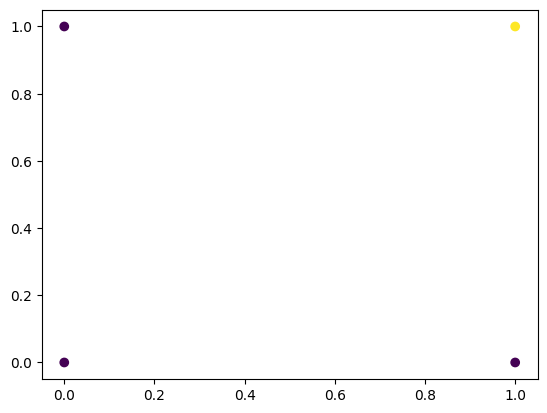

In [58]:
plt.scatter(x1,x2,c=y)

In [59]:
def create_dataset(x1,x2,y):
  x1 = np.repeat(x1,50)
  x2 = np.repeat(x2,50)
  y = np.repeat(y,50)

  #Add noise
  x1 = x1 + np.random.randn(x1.shape[0])*0.05
  x2 = x2 + np.random.randn(x2.shape[0])*0.05

  #shuffle
  index_shuffle = np.arange(x1.shape[0])
  np.random.shuffle(index_shuffle)

  x1 = x1.astype(np.float32)
  x2 = x2.astype(np.float32)
  y = y.astype(np.float32)

  x1 = x1[index_shuffle]
  x2 = x2[index_shuffle]
  y  = y [index_shuffle]

  x1_torch = torch.from_numpy(x1).clone().view(-1,1)
  x2_torch = torch.from_numpy(x2).clone().view(-1,1)
  y_torch = torch.from_numpy(y).clone().view(-1,1)

  X = torch.hstack([x1_torch,x2_torch])
  X_train = X[:150,:]
  X_test  = X[150:,:]
  y_train = y_torch[:150,:]
  y_test  = y_torch[150:,:]

  return X_train, y_train, X_test, y_test


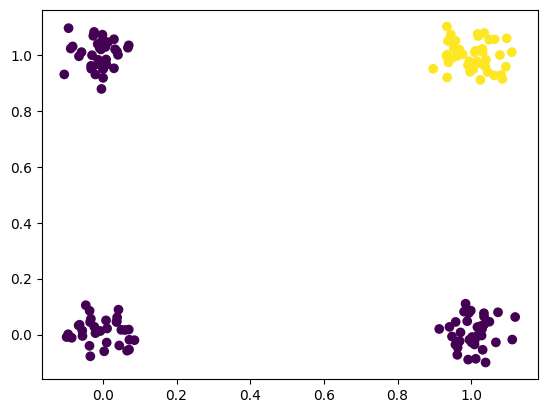

In [60]:
X_train,y_train,X_test,y_test = create_dataset(x1,x2,y)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [61]:
from torch import nn
class LogisticRegression(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LogisticRegression,self).__init__()
    self.linear_layer = nn.Linear(input_dim,output_dim)

  def forward(self,x):
    x = self.linear_layer(x)
    outputs = torch.sigmoid(x)
    return outputs

In [62]:
model_AND = LogisticRegression(2,1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(params=model_AND.parameters(),lr=0.01)

In [63]:
def train(model,criterion,optimizer,X,y,iter):
  all_loss = []
  for epoch in range(iter):
    y_hat = model(X)

    loss = criterion(y_hat, y)

    all_loss.append(loss.item())
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
  return all_loss

In [64]:
all_loss = train(model_AND,criterion,optimizer,X_train,y_train,50000)

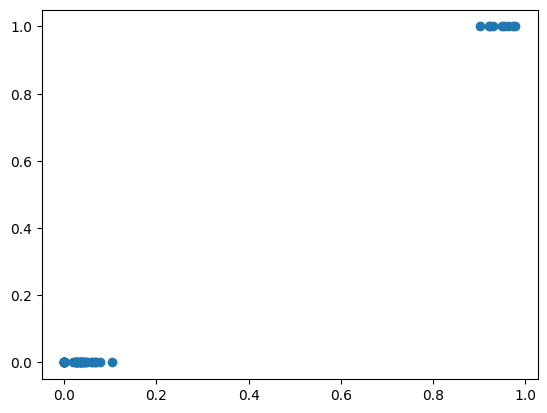

In [65]:
y_pred = model_AND.forward(X_test)
plt.scatter(y_pred.detach().numpy(),y_test)

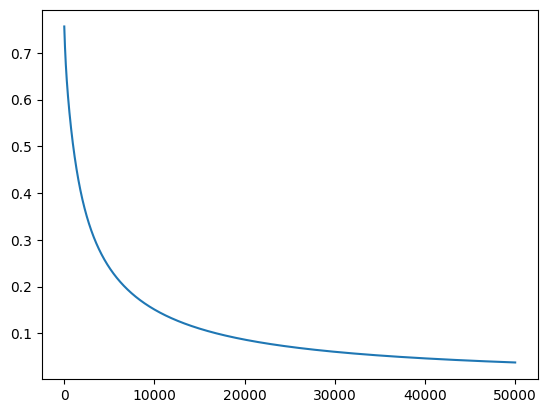

In [66]:
plt.plot(all_loss)

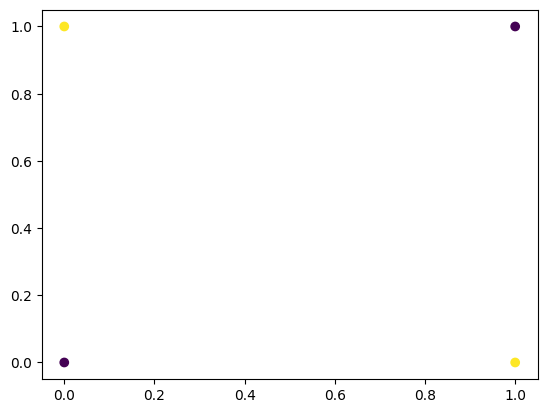

In [67]:
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([0., 1., 1., 0. ],dtype = np.float32)
plt.scatter(x1, x2, c=y)

In [68]:
def create_dataset(x1,x2,y):
  x1 = np.repeat(x1,50)
  x2 = np.repeat(x2,50)
  y = np.repeat(y,50)

  #Add noise
  x1 = x1 + np.random.randn(x1.shape[0])*0.05
  x2 = x2 + np.random.randn(x2.shape[0])*0.05

  #shuffle
  index_shuffle = np.arange(x1.shape[0])
  np.random.shuffle(index_shuffle)

  x1 = x1.astype(np.float32)
  x2 = x2.astype(np.float32)
  y = y.astype(np.float32)

  x1 = x1[index_shuffle]
  x2 = x2[index_shuffle]
  y  = y [index_shuffle]

  x1_torch = torch.from_numpy(x1).clone().view(-1,1)
  x2_torch = torch.from_numpy(x2).clone().view(-1,1)
  y_torch = torch.from_numpy(y).clone().view(-1,1)

  X = torch.hstack([x1_torch,x2_torch])
  X_train = X[:150,:]
  X_test  = X[150:,:]
  y_train = y_torch[:150,:]
  y_test  = y_torch[150:,:]

  return X_train, y_train, X_test, y_test


In [69]:
# Repeat the numbers from x1, x2, and y 50 times
x1 = np.repeat(x1, 50)
x2 = np.repeat(x2, 50)
y =  np.repeat(y,  50)

# Add noise to data points just to have some data variety
x1 = x1 + np.random.rand(x1.shape[0])*0.05
x2 = x2 + np.random.rand(x2.shape[0])*0.05

# Shuffle
index_shuffle = np.arange(x1.shape[0])
np.random.shuffle(index_shuffle)

x1 = x1.astype(np.float32)
x2 = x2.astype(np.float32)
y  = y.astype(np.float32)

x1 = x1[index_shuffle]
x2 = x2[index_shuffle]
y  = y [index_shuffle]

# Convert data to tensors
x1_torch = torch.from_numpy(x1).clone().view(-1, 1)
x2_torch = torch.from_numpy(x2).clone().view(-1, 1)
x3_torch = torch.mul(x1_torch, x2_torch)


# Combine X1 and X2
X = torch.hstack([x1_torch, x2_torch, x3_torch])
y_torch = torch.from_numpy(y).clone().view(-1, 1)

# Split into training and testing
X_train = X[:150,:]
X_test  = X[150:,:]
y_train = y_torch[:150,:]
y_test  = y_torch[150:,:]


In [70]:
model_XOR = LogisticRegression(3,1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model_XOR.parameters(),lr=0.01)



In [71]:
all_loss = train(model_XOR, criterion, optimizer, X_train, y_train, 50000)

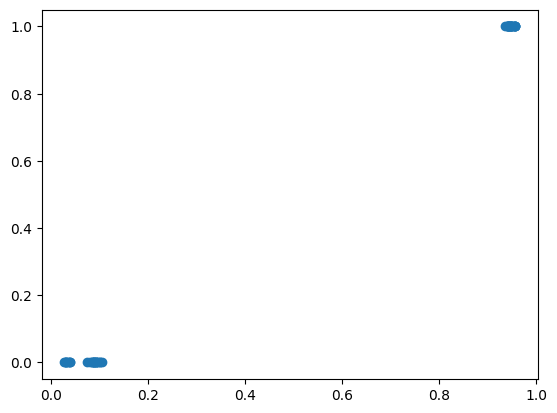

In [72]:
y_pred = model_XOR.forward(X_test)
plt.scatter(y_pred.detach().numpy(), y_test)

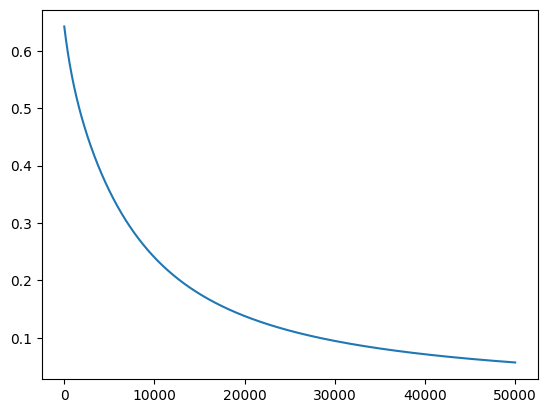

In [73]:
plt.plot(all_loss)